## Exploratory Data Analysis (EDA)
## Haifaa Alzahrani
## 29/10/2020

Note: The used dataset is not reliable, it has duplication issues and needs to manually verified. However, the aim of this project is just to apply the skills rather than accurately analysing the data or building reliable model. 

In [1]:
# Import packages
import math
import pandas as pd # For DataFrame 
import numpy as np # Array and numerical processing
import matplotlib.pyplot as plt # Low level plotting
import seaborn as sns # High level Plotting

# Setting plots
#current_palette = sns.color_palette()
current_palette = sns.diverging_palette(220, 20, n=25)

pd.set_option('display.max_columns', 999)
low_memory=False

In [2]:
# Read the dataset
books = pd.read_csv("~/MISK_DSI/R/DS_Research_GoodreadsBooks/Data/full_books.csv")

In [3]:
# Examine the dataset
books.info()
print()
books.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          11123 non-null  int64  
 1   bookID              11123 non-null  int64  
 2   title               11123 non-null  object 
 3   authors             4562 non-null   object 
 4   average_rating      11123 non-null  float64
 5   isbn                11123 non-null  object 
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  int64  
 11  publisher           11123 non-null  object 
 12  genre_and_votes     642 non-null    object 
 13  awards              204 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 1.2+ MB



,Unnamed: 0,bookID,title,authors,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre_and_votes,awards
0,0,44012,Shield of Thunder (Troy #2),NaN,4.36,345477014,ale,512,102,16,2007,Ballantine Books,NaN,NaN
1,1,4315,Zaat,صنع الله إبراهيم,3.55,9774248449,ara,349,122,12,2004,American University in Cairo Press,NaN,NaN
2,2,2819,A Circle of Quiet (Crosswicks Journals #1),NaN,4.21,62545035,en-CA,246,5236,506,1984,HarperOne,NaN,NaN
3,3,4451,People of the Lie: The Hope for Healing Human ...,NaN,3.98,684848597,en-CA,272,6256,459,1998,Touchstone,NaN,NaN
4,4,5327,A Christmas Carol,P.J. Lynch,4.05,763631205,en-CA,160,4359,353,2006,Candlewick Press,NaN,NaN
5,5,18182,A Theory of Fun for Game Design,Will Wright,3.94,1932111972,en-CA,256,2113,181,2004,Paraglyph Press,NaN,NaN
6,6,20671,Monkeyluv: And Other Essays on Our Lives as An...,NaN,4.17,743260163,en-CA,209,1024,102,2006,Scribner,NaN,NaN
7,7,21829,Creepers,NaN,3.66,1593153570,en-CA,388,4513,515,2005,CDS Books,NaN,NaN
8,8,44628,The Last Shot: City Streets Basketball Dreams,NaN,4.17,618446710,en-CA,233,5106,155,2004,Mariner Books,NaN,NaN
9,9,537,The Lovely Bones,NaN,3.81,330485385,en-GB,328,6485,966,2003,Picador,NaN,NaN


In [4]:
# Number of authors
len(books['authors'].unique())

3238

In [5]:
# Number of books per author
books['authors'].value_counts()

Tracy Hickman     27
Quentin Blake     19
Takeshi Obata     18
Sandra Brown      18
Garth Williams    16
                  ..
森 薫                1
Abbe Wool          1
Phil Hester        1
Denys L. Page      1
Be-Pas             1
Name: authors, Length: 3237, dtype: int64

## There are duplicated books due to adding different parts or edition as separated books.

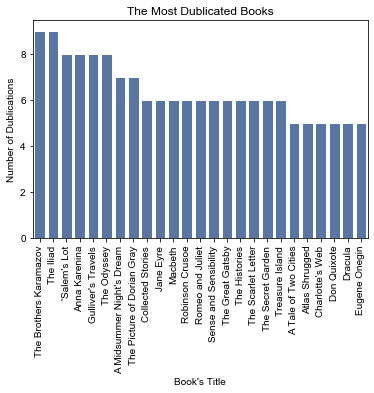

In [6]:
most_repeated = books.groupby('title').size().nlargest(25)
plt.title("The Most Dublicated Books")
sns.set(style="whitegrid")
sns.barplot(most_repeated.index, most_repeated.values, color ="b") #palette = current_palette
plt.xlabel("Book's Title")
plt.ylabel("Number of Dublications")
plt.xticks(rotation=90)
plt.show()

## The most 25 popular authors according to rating count for their books.

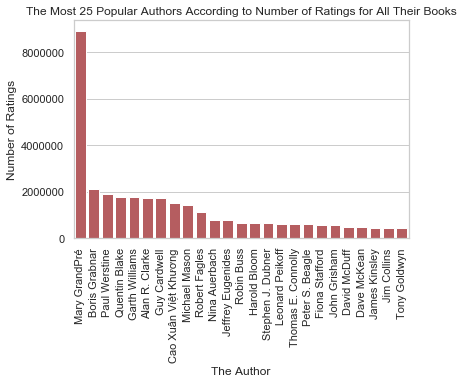

In [7]:
popular_authors = books.groupby('authors').sum().ratings_count.nlargest(25)
plt.title("The Most 25 Popular Authors According to Number of Ratings for All Their Books")
sns.set(style="darkgrid") #dark, white, ticks
sns.barplot(popular_authors.index, popular_authors.values, color = "r")
plt.xlabel("The Author")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()

## The books that got the highest 25 number ratings.

To learn the most popular books.

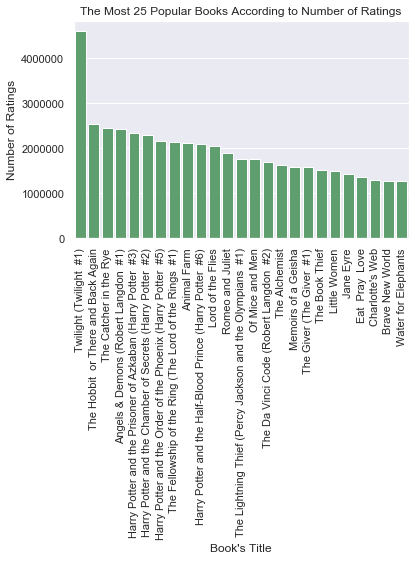

In [8]:
popular_books = books.groupby('title').sum().ratings_count.nlargest(25)
plt.title("The Most 25 Popular Books According to Number of Ratings")
sns.barplot(popular_books.index, popular_books.values, color = "g")
sns.set(style="white") 
plt.xlabel("Book's Title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()

## The books that got the highest 25 count of reviews. 

To know which books motivate readers to discuss about them.

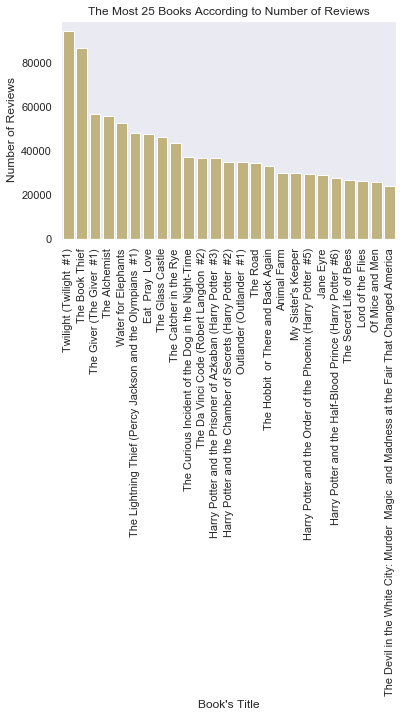

In [10]:
interesting_books = books.groupby('title').sum().text_reviews_count.nlargest(25)
plt.title("The Most 25 Books According to Number of Reviews")
sns.barplot(interesting_books.index, interesting_books.values, color ="y")
sns.set(style="dark") #, ticks
plt.xlabel("Book's Title")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.show()

## Top 25 years according to the number of the published books.


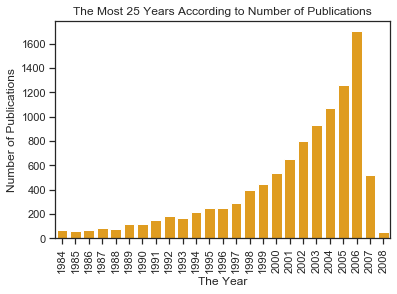

In [12]:
years = books.groupby('publication_date').size().nlargest(25)
plt.title("The Most 25 Years According to Number of Publications")
sns.barplot(years.index, years.values, color ="orange")
sns.set(style="ticks")
plt.xlabel("The Year")
plt.ylabel("Number of Publications")
plt.xticks(rotation=90)
plt.show()